# PSET 5 - TABULAR MODELLING

## Load & import packages

In [1]:
!pip install -Uqq fastai --upgrade
!pip install -Uqq fastcore --upgrade
!pip install -Uqq kaggle --upgrade

     |████████████████████████████████| 194kB 14.3MB/s eta 0:00:01
     |████████████████████████████████| 61kB 6.0MB/s 
     |████████████████████████████████| 776.8MB 27kB/s 
     |████████████████████████████████| 12.8MB 34.9MB/s 
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.7.1 which is incompatible.


In [2]:
import fastai
import fastcore
print('Fast.ai version:', fastai.__version__)
print('Fastcore version:', fastcore.__version__)

Fast.ai version: 2.3.0
Fastcore version: 1.3.19


In [3]:
from fastai.tabular.all import *

In [4]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



## Load Dataset

In [5]:
path = Path('/content/drive/MyDrive/Colab Notebooks/PSET 5/DATA')

In [6]:
path

Path('/content/drive/MyDrive/Colab Notebooks/PSET 5/DATA')

In [197]:
pm_test = pd.read_csv(path/'pm_test.csv')
pm_train = pd.read_csv(path/'pm_train.csv')
weather = pd.read_csv(path/'weather.csv')

In [198]:
pm_test.head(1)

,ID,date,latitude,longitude,type,source,station,aqi
0,326340,2019-01-05 00:00:00,47.928387,106.92947,PM2.5,Stateair.mn,АНУ-ын Элчин сайдын яам,361.0


In [199]:
pm_train.head(1)

,ID,date,latitude,longitude,type,source,station,aqi
0,1,2015-09-01 09:00:00,47.922497,106.79481,PM10,Agaar.mn,Толгойт,31.0


In [200]:
weather.head(1)

,Unnamed: 0,date,summary,icon,precipIntensity,precipProbability,temperature,apparentTemperature,dewPoint,humidity,windSpeed,windBearing,cloudCover,uvIndex,visibility
0,0,2015-09-01 00:00:00,Partly Cloudy,partly-cloudy-night,0.0,0.0,16.39,16.39,12.09,0.76,4.01,354.0,0.53,0.0,10.003


## Merge with weather

In [201]:
pm_train_merged = weather.merge(pm_train, on='date', how='right')

In [202]:
pm_test_merged = weather.merge(pm_test, on='date', how='right')

In [203]:
pm_train_merged.shape

(326339, 22)

In [204]:
pm_test_merged.shape

(91964, 22)

## Data Cleaning

### Handling Dates

In [205]:
pm_train_merged = add_datepart(pm_train_merged, 'date')
pm_test_merged = add_datepart(pm_test_merged, 'date')

In [206]:
' '.join(o for o in pm_test_merged.columns if o.startswith('aqi'))

'aqi'

In [207]:
pm_train_merged.dtypes

Unnamed: 0             float64
summary                 object
icon                    object
precipIntensity        float64
precipProbability      float64
temperature            float64
apparentTemperature    float64
dewPoint               float64
humidity               float64
windSpeed              float64
windBearing            float64
cloudCover             float64
uvIndex                float64
visibility             float64
ID                       int64
latitude               float64
longitude              float64
type                    object
source                  object
station                 object
aqi                    float64
Year                     int64
Month                    int64
Week                     int64
Day                      int64
Dayofweek                int64
Dayofyear                int64
Is_month_end              bool
Is_month_start            bool
Is_quarter_end            bool
Is_quarter_start          bool
Is_year_end               bool
Is_year_

In [208]:
pm_test_merged.dtypes

Unnamed: 0             float64
summary                 object
icon                    object
precipIntensity        float64
precipProbability      float64
temperature            float64
apparentTemperature    float64
dewPoint               float64
humidity               float64
windSpeed              float64
windBearing            float64
cloudCover             float64
uvIndex                float64
visibility             float64
ID                       int64
latitude               float64
longitude              float64
type                    object
source                  object
station                 object
aqi                    float64
Year                     int64
Month                    int64
Week                     int64
Day                      int64
Dayofweek                int64
Dayofyear                int64
Is_month_end              bool
Is_month_start            bool
Is_quarter_end            bool
Is_quarter_start          bool
Is_year_end               bool
Is_year_

In [19]:
pm_train_merged['Elapsed'] = pm_train_merged['Elapsed'].astype('int64')

In [20]:
pm_test_merged['Elapsed'] = pm_test_merged['Elapsed'].astype('int64')

### Deleting unuseful columns

In [209]:
pm_test_merged_deleted = pm_test_merged.drop(['apparentTemperature','source','Unnamed: 0','icon','summary','precipIntensity','precipProbability','windSpeed','windBearing','cloudCover','uvIndex','visibility'], axis = 1)

In [210]:
pm_train_merged_deleted = pm_train_merged.drop(['apparentTemperature','source','Unnamed: 0','icon','summary','precipIntensity','precipProbability','windSpeed','windBearing','cloudCover','uvIndex','visibility'], axis = 1)

In [211]:
print(pm_train['aqi'].isnull().values.any())
print(pm_train.isnull().values.any())
print(pm_test['aqi'].isnull().values.any())
print(pm_test.isnull().values.any())
print(pm_test['aqi'].isnull().sum())
print(pm_test.shape)


False
False
True
True
90811
(91964, 8)


In [212]:
pm_train_merged_deleted.head(1)

,temperature,dewPoint,humidity,ID,latitude,longitude,type,station,aqi,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed
0,13.3,10.18,0.81,1,47.922497,106.79481,PM10,Толгойт,31.0,2015,9,36,1,1,244,False,True,False,False,False,False,1.441098e+09


In [213]:
pm_train_merged_deleted['aqi_1'] = pm_train_merged_deleted.aqi.shift(1)
pm_train_merged_deleted['temperature_1'] = pm_train_merged_deleted.temperature.shift(1)
pm_train_merged_deleted['dewPoint_1'] = pm_train_merged_deleted.dewPoint.shift(1)
pm_train_merged_deleted['humidity_1'] = pm_train_merged_deleted.humidity.shift(1)

pm_train_merged_deleted['aqi_2'] = pm_train_merged_deleted.aqi.shift(2)
pm_train_merged_deleted['temperature_2'] = pm_train_merged_deleted.temperature.shift(2)
pm_train_merged_deleted['dewPoint_2'] = pm_train_merged_deleted.dewPoint.shift(2)
pm_train_merged_deleted['humidity_2'] = pm_train_merged_deleted.humidity.shift(2)

pm_train_merged_deleted['aqi_3'] = pm_train_merged_deleted.aqi.shift(3)
pm_train_merged_deleted['temperature_3'] = pm_train_merged_deleted.temperature.shift(3)
pm_train_merged_deleted['dewPoint_3'] = pm_train_merged_deleted.dewPoint.shift(3)
pm_train_merged_deleted['humidity_3'] = pm_train_merged_deleted.humidity.shift(3)

In [214]:
pm_train_merged_deleted.head(10)

,temperature,dewPoint,humidity,ID,latitude,longitude,type,station,aqi,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed,aqi_1,temperature_1,dewPoint_1,humidity_1,aqi_2,temperature_2,dewPoint_2,humidity_2,aqi_3,temperature_3,dewPoint_3,humidity_3
0,13.30,10.18,0.81,1,47.922497,106.794810,PM10,Толгойт,31.0,2015,9,36,1,1,244,False,True,False,False,False,False,1.441098e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13.30,10.18,0.81,2,47.932907,106.921390,PM10,100 айл,36.0,2015,9,36,1,1,244,False,True,False,False,False,False,1.441098e+09,31.0,13.3,10.18,0.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,13.30,10.18,0.81,3,47.929733,106.888626,PM10,МҮОНРТ,36.0,2015,9,36,1,1,244,False,True,False,False,False,False,1.441098e+09,36.0,13.3,10.18,0.81,31.0,13.3,10.18,0.81,NaN,NaN,NaN,NaN
3,13.30,10.18,0.81,4,47.915382,106.894196,PM10,Баруун 4 зам,37.0,2015,9,36,1,1,244,False,True,False,False,False,False,1.441098e+09,36.0,13.3,10.18,0.81,36.0,13.3,10.18,0.81,31.0,13.3,10.18,0.81
4,13.30,10.18,0.81,5,47.894340,106.882470,PM10,Мишээл экспо,30.0,2015,9,36,1,1,244,False,True,False,False,False,False,1.441098e+09,37.0,13.3,10.18,0.81,36.0,13.3,10.18,0.81,36.0,13.3,10.18,0.81
5,13.30,10.18,0.81,6,47.917606,106.937360,PM2.5,Бөхийн өргөө,36.0,2015,9,36,1,1,244,False,True,False,False,False,False,1.441098e+09,30.0,13.3,10.18,0.81,37.0,13.3,10.18,0.81,36.0,13.3,10.18,0.81
6,13.30,10.18,0.81,7,47.929733,106.888626,PM2.5,МҮОНРТ,31.0,2015,9,36,1,1,244,False,True,False,False,False,False,1.441098e+09,36.0,13.3,10.18,0.81,30.0,13.3,10.18,0.81,37.0,13.3,10.18,0.81
7,13.30,10.18,0.81,8,47.917606,106.937360,PM10,Бөхийн өргөө,26.0,2015,9,36,1,1,244,False,True,False,False,False,False,1.441098e+09,31.0,13.3,10.18,0.81,36.0,13.3,10.18,0.81,30.0,13.3,10.18,0.81
8,13.30,10.18,0.81,9,47.863940,106.779090,PM2.5,Нисэх,31.0,2015,9,36,1,1,244,False,True,False,False,False,False,1.441098e+09,26.0,13.3,10.18,0.81,31.0,13.3,10.18,0.81,36.0,13.3,10.18,0.81
9,14.26,9.99,0.76,10,47.863940,106.779090,PM2.5,Нисэх,44.0,2015,9,36,1,1,244,False,True,False,False,False,False,1.441102e+09,31.0,13.3,10.18,0.81,26.0,13.3,10.18,0.81,31.0,13.3,10.18,0.81


In [218]:
pm_train_merged_deleted[pm_train_merged_deleted.isnull().any(axis=1)].shape


(342, 36)

In [216]:
pm_train_merged_deleted['rolling_mean'] = pm_train_merged_deleted['aqi'].rolling(window=7).mean()

In [217]:
pm_train_merged_deleted['expanding_mean'] = pm_train_merged_deleted['aqi'].expanding(2).mean()

In [219]:
pm_train_merged_deleted = pm_train_merged_deleted.dropna(axis=0).reset_index()

In [220]:
pm_train_merged_deleted[pm_train_merged_deleted.isnull().any(axis=1)].shape

(0, 37)

## Build Dataloaders

### Just found out I didn't have to use test.csv at all. hha

In [221]:
cont, cat = cont_cat_split(pm_train_merged_deleted, 1, dep_var='aqi')
procs = [FillMissing, Categorify, Normalize]

In [222]:
valid_idx = pm_train_merged_deleted.sample(frac=0.2, random_state=42).index.values

In [223]:
dls = TabularDataLoaders.from_df(pm_train_merged_deleted, 
                                 path='.', 
                                 procs=procs, 
                                 cat_names=cat, 
                                 cont_names=cont, 
                                 y_names="aqi", 
                                 valid_idx=valid_idx,
                                 bs=64)

In [224]:
dls.show_batch()

,type,station,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,index,temperature,dewPoint,humidity,ID,latitude,longitude,Year,Month,Week,Day,Dayofweek,Dayofyear,Elapsed,aqi_1,temperature_1,dewPoint_1,humidity_1,aqi_2,temperature_2,dewPoint_2,humidity_2,aqi_3,temperature_3,dewPoint_3,humidity_3,rolling_mean,expanding_mean,aqi
0,PM10,МҮОНРТ,False,False,False,False,False,False,27379.998492,-17.73,-20.990000,0.76,27380.998492,47.929733,106.888626,2015.0,12.0,49.000000,3.0,3.000000e+00,337.000001,1.449169e+09,72.999999,-17.729999,-20.989999,0.76,79.000001,-17.729999,-20.990000,0.76,114.000000,-17.730000,-20.990000,0.76,79.428574,102.949379,78.0
1,PM2.5,Баруун 4 зам,False,False,False,False,False,False,181333.000209,-20.36,-22.729999,0.81,181334.000209,47.915382,106.894196,2017.0,2.0,8.000000,25.0,5.000000e+00,56.000000,1.487999e+09,307.000006,-20.360001,-22.730000,0.81,299.000005,-20.360001,-22.730000,0.81,322.000003,-20.360001,-22.730000,0.81,268.857148,129.176864,302.0
2,PM10,Нисэх,False,False,False,False,False,False,179690.999720,-10.75,-14.980000,0.71,179691.999720,47.863941,106.779091,2017.0,2.0,8.000000,21.0,1.000000e+00,51.999995,1.487671e+09,137.999999,-10.750000,-14.980000,0.71,213.000004,-10.750000,-14.979999,0.71,139.999999,-10.750000,-14.980000,0.71,151.000001,129.042572,138.0
3,PM10,Амгалан,False,False,False,False,False,False,205159.000498,3.29,-12.380000,0.31,205160.000498,47.913429,106.997910,2017.0,4.0,17.000000,27.0,3.000000e+00,117.000003,1.493280e+09,135.000000,3.290000,-12.380000,0.31,138.000001,3.290000,-12.380000,0.31,128.000000,3.290000,-12.380000,0.31,127.571426,124.978455,130.0
4,PM2.5,Толгойт,False,False,False,False,False,False,187728.000435,-4.73,-12.000000,0.57,187729.000435,47.922497,106.794807,2017.0,3.0,9.999999,12.0,6.000000e+00,70.999999,1.489324e+09,108.000000,-4.730000,-12.000000,0.57,117.000000,-4.730000,-12.000000,0.57,105.000000,-4.730000,-12.000000,0.57,108.857140,128.001312,117.0
5,PM2.5,Бөхийн өргөө,False,False,False,False,False,False,239144.001721,-0.75,-2.000000,0.91,239145.001721,47.917606,106.937363,2017.0,9.0,37.000000,16.0,5.000000e+00,259.000002,1.505545e+09,90.000000,-0.750000,-2.000000,0.91,106.000000,-0.750000,-2.000000,0.91,114.000000,0.270000,-1.010000,0.91,81.142859,117.044052,14.0
6,PM2.5,АНУ-ын Элчин сайдын яам,False,False,False,False,False,False,211534.000151,4.53,-11.720000,0.30,211535.000151,47.928387,106.929466,2017.0,5.0,19.000000,12.0,4.000000e+00,131.999999,1.494630e+09,119.000000,4.530000,-11.720000,0.30,117.000000,4.530000,-11.720000,0.30,114.000000,4.530000,-11.720000,0.30,95.571427,123.862778,27.0
7,PM2.5,Нисэх,False,False,False,False,False,False,243198.999408,12.26,-8.980000,0.22,243199.999408,47.863941,106.779091,2017.0,10.0,40.000000,3.0,1.000000e+00,275.999997,1.507046e+09,30.000001,12.260000,-8.980000,0.22,30.999999,12.260000,-8.980000,0.22,29.000001,12.260000,-8.980000,0.22,64.285713,116.214783,29.0
8,PM2.5,МҮОНРТ,False,False,False,False,False,False,177729.999767,-14.72,-19.010000,0.70,177730.999767,47.929733,106.888626,2017.0,2.0,7.000000,16.0,3.000000e+00,46.999995,1.487257e+09,105.000000,-14.720000,-19.010000,0.70,127.000000,-15.500000,-19.700001,0.70,123.000000,-15.500000,-19.700001,0.70,118.000000,129.135803,104.0
9,PM10,МҮОНРТ,False,False,False,False,False,False,298147.997729,19.27,0.010000,0.27,298148.997729,47.929733,106.888626,2018.0,6.0,24.000000,11.0,-4.492857e-08,162.000000,1.528744e+09,19.000000,19.270001,0.010000,0.27,20.000003,19.270000,0.010000,0.27,115.000000,19.270001,0.010000,0.27,72.857140,117.926247,111.0


## Learn

In [257]:
learn = tabular_learner(dls, metrics=rmse, layers=[500,250])

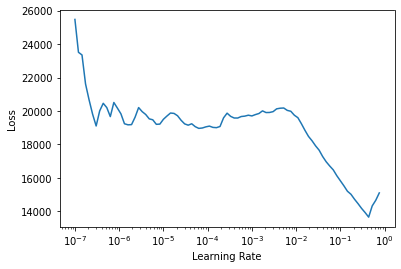

In [258]:
lr_min, lr_steep = learn.lr_find()

In [259]:
learn.fit_one_cycle(5, lr_min)

epoch,train_loss,valid_loss,_rmse,time
0,1146.134033,2650.678223,51.484734,01:06
1,1135.422119,1014.868103,31.856983,01:05
2,1002.048401,833.667908,28.873314,01:05
3,856.870605,1132.798462,33.657078,01:06
4,756.144714,765.466370,27.667061,01:11


In [233]:
learn = tabular_learner(dls, metrics=rmse, layers=[200,100])

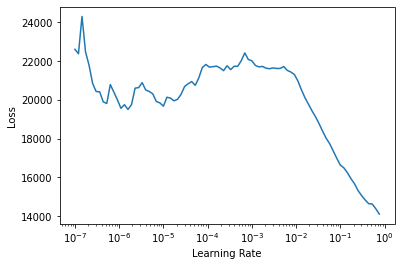

In [237]:
lr_min, lr_steep = learn.lr_find()

In [238]:
learn.fit_one_cycle(5, lr_min)

epoch,train_loss,valid_loss,_rmse,time
0,1263.102051,12578.156250,112.152351,01:05
1,1213.662964,1133.598389,33.668953,01:04
2,1140.598755,1669.350708,40.857666,01:05
3,1044.640747,947.846436,30.787113,01:05
4,830.435913,767.133240,27.697172,01:06
